# Clustering Crypto

In [175]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [176]:
# Load the crypto_data.csv dataset.
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [177]:
### Keep all the cryptocurrencies that are being traded.

In [178]:
crypto_df["IsTrading"].value_counts()


True     1144
False     108
Name: IsTrading, dtype: int64

In [179]:
(crypto_df["IsTrading"] == True)

42       True
365      True
404      True
611      True
808      True
        ...  
XBC      True
DVTC    False
GIOT    False
OPSC    False
PUNK    False
Name: IsTrading, Length: 1252, dtype: bool

In [180]:
crypto_trading_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_trading_df.shape
crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   IsTrading        1144 non-null   bool   
 3   ProofType        1144 non-null   object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  1144 non-null   object 
dtypes: bool(1), float64(1), object(4)
memory usage: 54.7+ KB


In [181]:
crypto_trading_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [182]:
# Remove the "IsTrading" column. 
crypto_trading_df.drop("IsTrading", axis=1, inplace=True)


C:\Users\tabat\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [183]:
crypto_trading_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [184]:
### Keep all the cryptocurrencies that have a working algorithm.

In [185]:
crypto_trading_df["Algorithm"].value_counts()

Scrypt                   394
X11                      182
SHA-256                  121
X13                       54
PoS                       42
                        ... 
VeChainThor Authority      1
Ouroboros                  1
POS 2.0                    1
Proof-of-BibleHash         1
TRC10                      1
Name: Algorithm, Length: 89, dtype: int64

In [186]:
crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1144 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1144 non-null   object 
 1   Algorithm        1144 non-null   object 
 2   ProofType        1144 non-null   object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  1144 non-null   object 
dtypes: float64(1), object(4)
memory usage: 53.6+ KB


In [187]:
# Remove rows that have at least 1 null value.
crypto_trading_df["TotalCoinsMined"].isnull().value_counts()

False    685
True     459
Name: TotalCoinsMined, dtype: int64

In [188]:
clean_crypto_trading_df = crypto_trading_df.dropna(how='any', axis='rows')
clean_crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 685 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         685 non-null    object 
 1   Algorithm        685 non-null    object 
 2   ProofType        685 non-null    object 
 3   TotalCoinsMined  685 non-null    float64
 4   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.1+ KB


In [189]:
clean_crypto_trading_df.shape

(685, 5)

In [190]:
# Keep the rows where coins are mined.
(clean_crypto_trading_df["TotalCoinsMined"] > 0)

42       True
404      True
808     False
1337     True
BTC      True
        ...  
ZEPH     True
GAP      True
BDX      True
ZEN      True
XBC      True
Name: TotalCoinsMined, Length: 685, dtype: bool

In [191]:
clean_crypto_df = clean_crypto_trading_df[clean_crypto_trading_df["TotalCoinsMined"] > 0]
clean_crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [192]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = clean_crypto_df.copy()
crypto_names_df = pd.DataFrame(crypto_names_df["CoinName"], index=crypto_names_df.index)
crypto_names_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [193]:
crypto_names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [194]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
clean_crypto_df = clean_crypto_df.drop("CoinName", axis=1)

In [195]:
clean_crypto_df.shape

(532, 4)

In [196]:
clean_crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [197]:
clean_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [198]:
clean_crypto_df["TotalCoinSupply"] = pd.to_numeric(clean_crypto_df["TotalCoinSupply"], errors='coerce')
clean_crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethash,PoW,1.076842e+08,0.000000e+00


In [199]:
clean_crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [200]:
output_file_path = "clean_crypto.csv"
clean_crypto_df.to_csv(output_file_path, index=True)

In [201]:
# Use get_dummies() to create variables for text features.
X_encoded = pd.get_dummies(data=clean_crypto_df, columns=["Algorithm", "ProofType"])
X_encoded.shape


(532, 98)

In [202]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorithm_Cr

In [203]:
scaler = StandardScaler()


In [204]:
# Standardize the data with StandardScaler().
X_scaled = scaler.fit_transform(X_encoded)

X_scaled[:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Deliverable 2: Reducing Data Dimensions Using PCA

In [205]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.34832245,  0.96228193, -0.54781075],
       [-0.33166784,  0.96244104, -0.54836202],
       [ 2.27775569,  1.38943436, -0.67172036],
       ...,
       [ 0.35657633, -2.13887567,  0.35341414],
       [-0.14064205, -2.14192416,  0.45497178],
       [-0.2893942 ,  0.92436013, -0.25563484]])

In [206]:
# Create a DataFrame with the three principal components.
X_pca_df = pd.DataFrame(
            data=X_pca,
            columns = ["PC 1", "PC 2", "PC 3"],
            index=X_encoded.index)

In [207]:
X_pca_df

,PC 1,PC 2,PC 3
42,-0.348322,0.962282,-0.547811
404,-0.331668,0.962441,-0.548362
1337,2.277756,1.389434,-0.671720
BTC,-0.137978,-1.316100,0.183407
ETH,-0.131476,-1.915409,0.346152
...,...,...,...
ZEPH,2.452592,0.733088,-0.248813
GAP,-0.346365,0.962183,-0.547848
BDX,0.356576,-2.138876,0.353414
ZEN,-0.140642,-2.141924,0.454972


In [208]:
pca.explained_variance_ratio_

array([0.02792724, 0.02111   , 0.02049936])

### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

In [209]:
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))


In [210]:
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X_pca_df)
    inertia.append(km.inertia_)

C:\Users\tabat\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


In [211]:
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [212]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(X_pca_df)

# Predict clusters
predictions = model.predict(X_pca_df)
predictions

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [213]:
X_pca_df["class"] = model.labels_
X_pca_df.head()

,PC 1,PC 2,PC 3,class
42,-0.348322,0.962282,-0.547811,0
404,-0.331668,0.962441,-0.548362,0
1337,2.277756,1.389434,-0.671720,0
BTC,-0.137978,-1.316100,0.183407,1
ETH,-0.131476,-1.915409,0.346152,1


In [214]:
# Print the shape of the clustered_df
X_pca_df["class"].value_counts()

0    286
1    239
3      6
2      1
Name: class, dtype: int64

In [215]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = clean_crypto_df.join(X_pca_df)

In [216]:
#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = clustered_df.join(crypto_names_df)

In [221]:
clustered_df.drop("class", axis=1, inplace=True)

In [222]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_
clustered_df.shape
clustered_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01,-0.348322,0.962282,-0.547811,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08,-0.331668,0.962441,-0.548362,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,3.141593e+11,2.277756,1.389434,-0.671720,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,2.100000e+07,-0.137978,-1.316100,0.183407,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0.000000e+00,-0.131476,-1.915409,0.346152,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,8.400000e+07,-0.150565,-0.985366,-0.010433,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,2.200000e+07,-0.431165,0.887220,-0.501419,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0.000000e+00,-0.127627,-2.068716,0.379480,Monero,1
ETC,Ethash,PoW,1.133597e+08,2.100000e+08,-0.129916,-1.915495,0.346124,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,2.100000e+07,-0.140641,-2.141924,0.454972,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

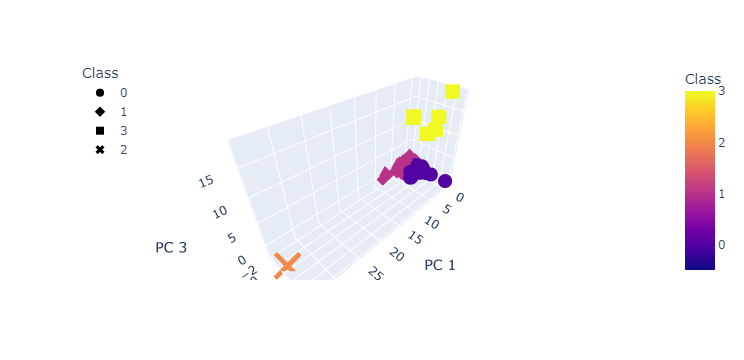

In [223]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [224]:
# Create a table with tradable cryptocurrencies.
clustered_df[
    [
        "CoinName",
        "Algorithm",
        "ProofType",
        "TotalCoinSupply",
        "TotalCoinsMined",
        "Class",
    ]
].hvplot.table()

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [225]:
# Print the total number of tradable cryptocurrencies.
print(f"Total number of tradable cryptocurrencies is {clustered_df.shape[0]}.")

Total number of tradable cryptocurrencies is 532.


In [226]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
mm_scaler = MinMaxScaler()
plot_data = mm_scaler.fit_transform(
    clustered_df[["TotalCoinSupply", "TotalCoinsMined"]])

plot_data

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [227]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    plot_data, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df["CoinName"] = clustered_df["CoinName"]

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df["Class"] = clustered_df["Class"]


In [228]:
plot_df.head()

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,0
404,5.320000e-04,0.001066,404Coin,0
1337,3.141593e-01,0.029576,EliteCoin,0
BTC,2.100000e-05,0.000018,Bitcoin,1
ETH,0.000000e+00,0.000109,Ethereum,1


In [229]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined", y="TotalCoinSupply", hover_cols=["CoinName"], by="Class")


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)